In [7]:
# processing
import numpy as np
import pandas as pd
import tregs

# visualization
from tregs.mpl_pboc import plotting_style

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

plt.rcParams.update({'font.size': 12})
font_manager.fontManager.addfont('../../misc/lucida-sans-unicode.ttf')
plotting_style()

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426'}

In [2]:
df = pd.read_excel('../../data/Appendix2_Figure2_source_data.xlsx', skiprows=4)
df.head()

,Position,info_dicC,info_araAB,info_araC,info_rspA,info_dgoR,info_dicA,info_ftsK,info_lac,info_marR,info_rel,info_znuA,info_xylA,info_xylF,info_znuCB
0,-115,1.739778e-04,5.102484e-07,-3.146856e-04,1.439656e-05,NaN,1.578573e-04,-8.191778e-06,NaN,6.116058e-05,-1.624491e-06,-0.000056,3.653383e-04,-6.281237e-05,-0.000005
1,-114,-2.556720e-05,1.994198e-05,-7.448444e-06,-1.505529e-04,NaN,-9.967279e-05,-7.709442e-05,NaN,-1.535243e-07,-4.140475e-06,-0.000016,-1.004716e-04,7.921965e-04,-0.000032
2,-113,1.813357e-09,-1.129060e-07,-1.406336e-04,2.861006e-06,NaN,-4.574250e-07,-5.475536e-05,NaN,1.877764e-04,7.036003e-05,-0.000084,-8.716125e-05,-2.146071e-10,0.000093
3,-112,-1.111793e-06,7.846403e-06,1.162236e-05,3.455693e-07,NaN,-1.419448e-05,-2.993291e-07,NaN,-5.485602e-05,5.026346e-08,-0.000193,9.682329e-05,3.671778e-08,-0.000031
4,-111,8.161506e-06,7.032740e-04,9.084548e-08,1.757878e-04,NaN,-1.287985e-04,-1.275595e-07,NaN,-3.341571e-04,-2.708227e-06,0.000403,-4.625773e-07,1.962716e-06,-0.000064


In [3]:
footprint = df['info_marR'].values

In [4]:
def label_binding_site(ax, start, end, max_signal, type, label,
                       lifted=False):
    shade_color = {'P': '#A9BFE3', 'R': '#E8B19D', 'A': '#DCECCB'}
    label_color = {'P': '#738FC1', 'R': '#D56C55', 'A': '#7AA974'}
    ax.axvspan(start, end, alpha=0.7, color=shade_color[type])
    if lifted:
        y_coord = max_signal * 1.37
        text_y_coord = max_signal * 1.42
    else:
        y_coord = max_signal * 1.15
        text_y_coord = max_signal * 1.2
    ax.add_patch(mpl.patches.Rectangle((start, y_coord),
                                       end-start,
                                       max_signal * 0.2,
                                       facecolor=label_color[type],
                                       clip_on=False,
                                       linewidth = 0))
    ax.text(start + 0.5 * (end-start), text_y_coord, label, fontsize = 12, color = 'k',
            ha='center', va='baseline')

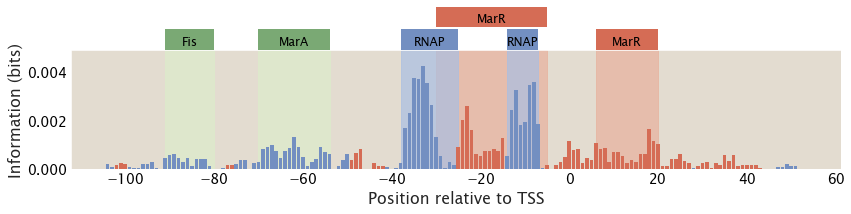

In [38]:
fig, ax = plt.subplots(figsize=(12, 3.5))

footprint_toplot = tregs.utils.smoothing(footprint, windowsize=3) * 2.5
max_signal = max(np.abs(footprint_toplot))
ax.set_ylim(top=max_signal*1.15)

total_signal = 0

region_params = [(-30, -5, 'R', 'MarR', True), (-91, -80, 'A', 'Fis'), (-70, -54, 'A', 'MarA'), 
                 (-38, -25, 'P', 'RNAP'), (-14, -7, 'P', 'RNAP'), (6, 20, 'R', 'MarR')]
for region in region_params:
    if len(region)==4:
        label_binding_site(ax, region[0], region[1], max_signal, region[2], region[3])
    else:
        label_binding_site(ax, region[0], region[1], max_signal, region[2], region[3],
                        lifted=region[4])
    total_signal += np.sum(footprint[(region[0]+115):(region[1]+116)])
total_noise = np.sum(footprint) - total_signal
mean_signal = total_signal / (region[1] - region[0] + 1)
mean_noise = total_noise / (160 - (region[1] - region[0] + 1))
stn_ratio = mean_signal / mean_noise

cut = int((3 - 1) / 2)
x = np.arange(-105 + cut, 55 - cut)

shiftcolors = [('#D56C55' if exshift < 0 else '#738FC1') for exshift in footprint_toplot]

ax.bar(x, np.abs(footprint_toplot), color=shiftcolors, edgecolor=None, linewidth=0)
ax.set_ylabel('Information (bits)', fontsize=16)
ax.set_xlabel('Position relative to TSS', fontsize=16)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig('../../manuscript/figures/plots/fig12/marR_footprint.pdf', bbox_inches='tight')
plt.show()